In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the data
ratings = pd.read_csv('../data/processed/cleaned_ratings.csv')
movies = pd.read_csv('../data/processed/cleaned_movies.csv')

/Users/uozdemir/miniforge3/envs/np_accelerate/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.0' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/uozdemir/miniforge3/envs/np_accelerate/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Display the first few rows of the datasets
print("Ratings Data:")
print(ratings.head())

Ratings Data:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [3]:
print("\nMovies Data:")
print(movies.head())


Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [4]:
# Basic statistics of the ratings dataset
print("\nRatings Data Statistics:")
print(ratings.describe())


Ratings Data Statistics:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


In [5]:
# Basic statistics of the movies dataset
print("\nMovies Data Statistics:")
print(movies.describe())


Movies Data Statistics:
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000


In [6]:
# Check for missing values
print("\nMissing Values in Ratings Data:")
print(ratings.isnull().sum())


Missing Values in Ratings Data:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [7]:
print("\nMissing Values in Movies Data:")
print(movies.isnull().sum())


Missing Values in Movies Data:
movieId    0
title      0
genres     0
dtype: int64


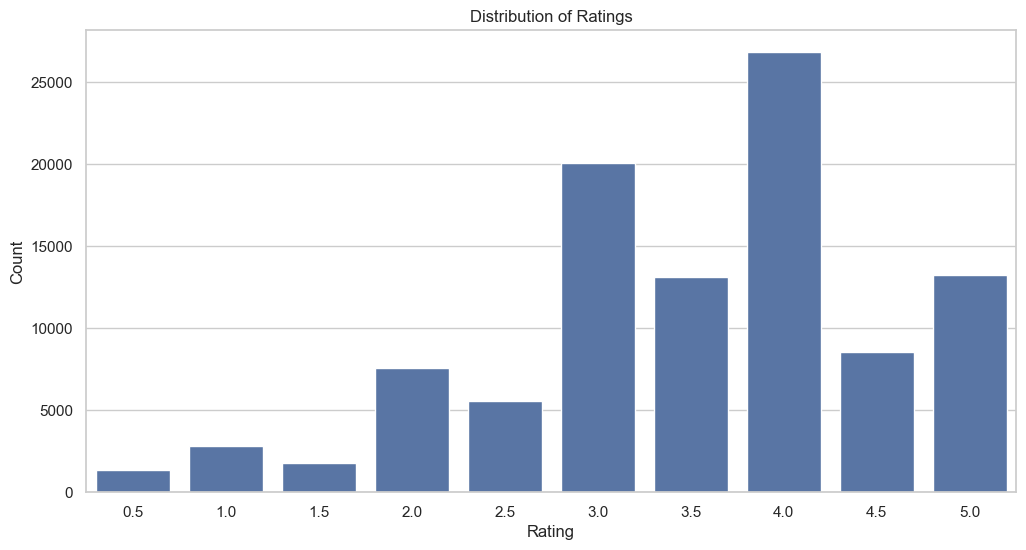

In [8]:
# Distribution of ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

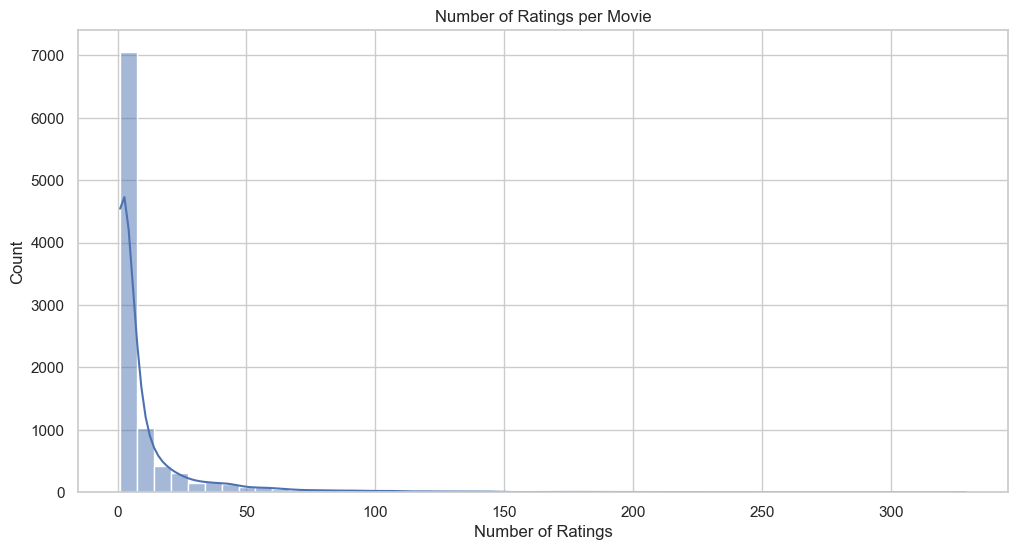

In [9]:
# Number of ratings per movie
ratings_per_movie = ratings.groupby('movieId').size()
plt.figure(figsize=(12, 6))
sns.histplot(ratings_per_movie, bins=50, kde=True)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

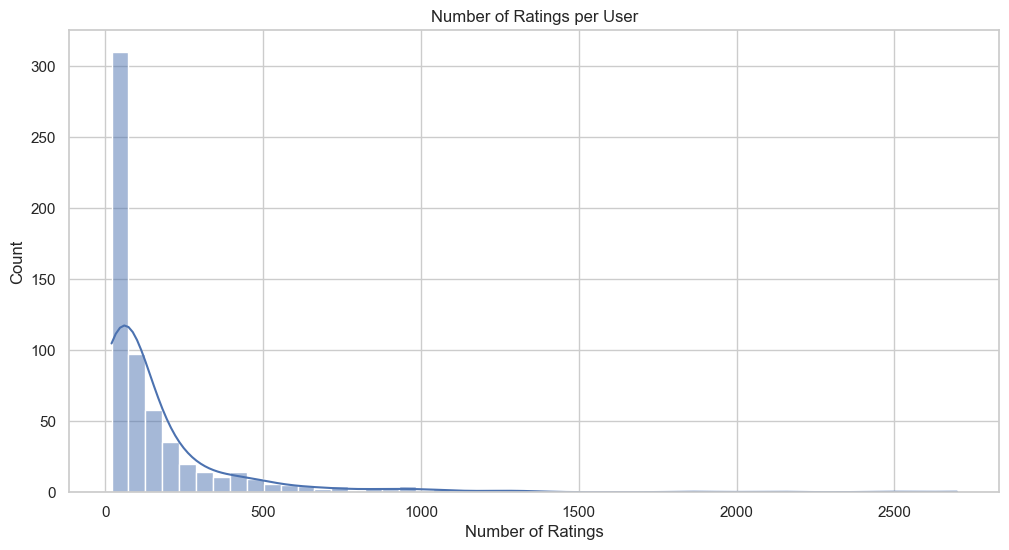

In [10]:
# Number of ratings per user
ratings_per_user = ratings.groupby('userId').size()
plt.figure(figsize=(12, 6))
sns.histplot(ratings_per_user, bins=50, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

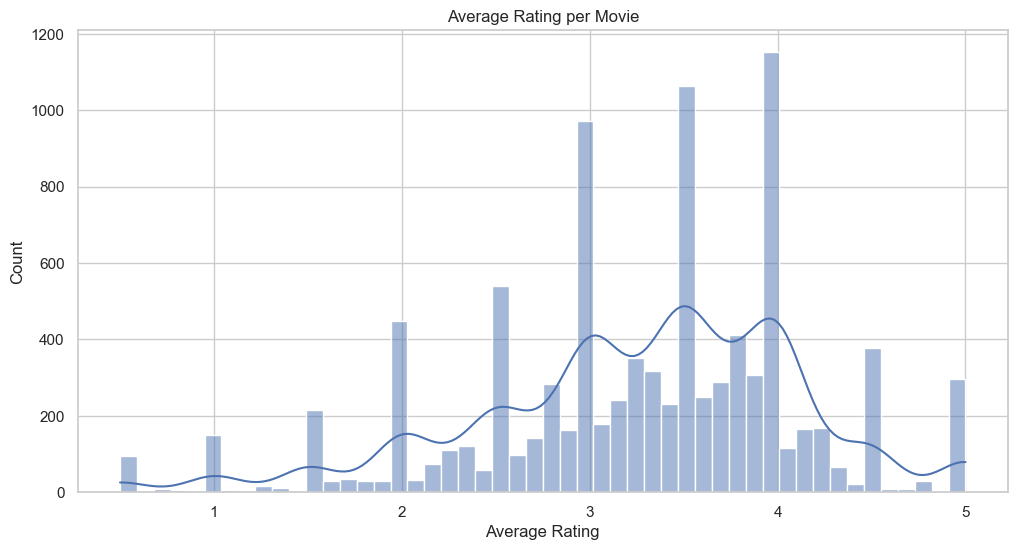

In [11]:
# Average rating per movie
average_rating_per_movie = ratings.groupby('movieId')['rating'].mean()
plt.figure(figsize=(12, 6))
sns.histplot(average_rating_per_movie, bins=50, kde=True)
plt.title('Average Rating per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()


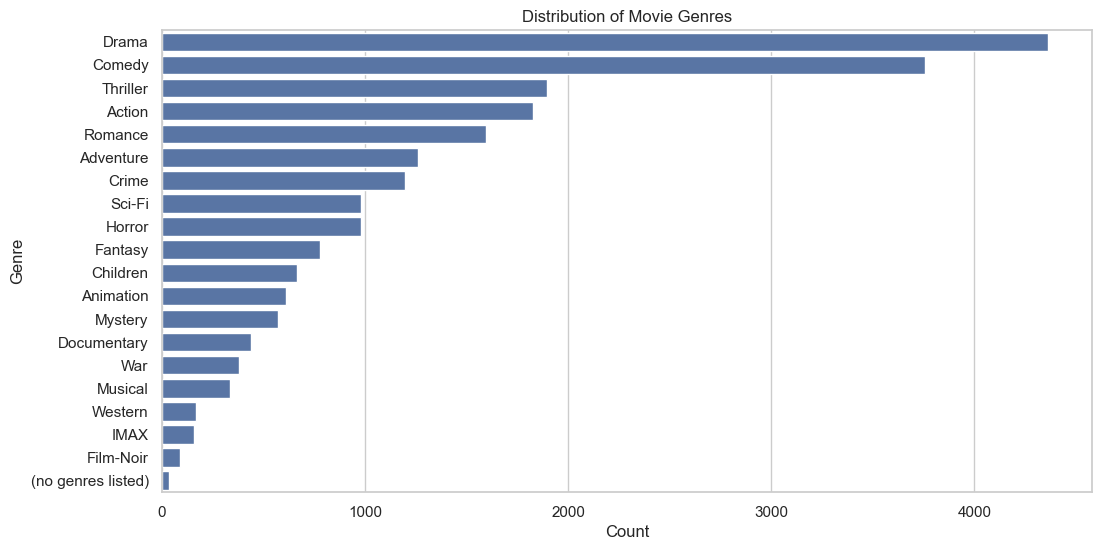

In [12]:
# Distribution of movie genres
# Split genres into individual genre rows
movies_genres = movies['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
movies_genres.name = 'genre'

plt.figure(figsize=(12, 6))
sns.countplot(y=movies_genres, order=movies_genres.value_counts().index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

/var/folders/l0/2jm3f21d7g96tn3vmxmkfdnh0000gn/T/ipykernel_1494/95120735.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='title', data=avg_ratings_top_10, palette='viridis')


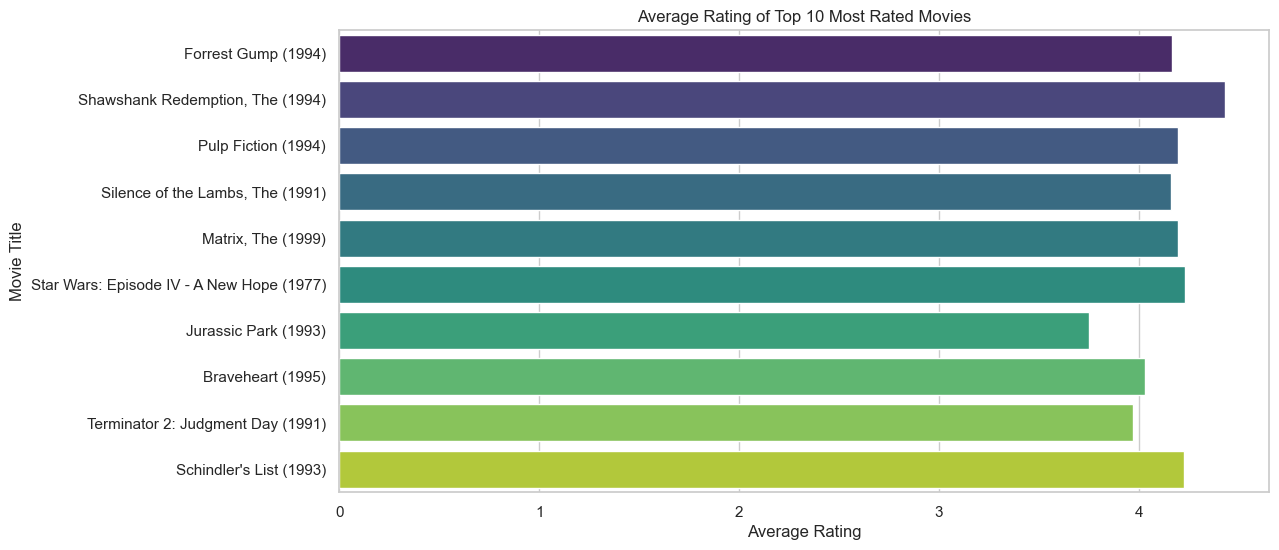

In [20]:
# Average rating of the top 10 most rated movies
top_10_ratings = ratings[ratings['movieId'].isin(top_10_rated_movies)]
avg_ratings_top_10 = top_10_ratings.groupby('movieId')['rating'].mean().reset_index()
avg_ratings_top_10 = avg_ratings_top_10.set_index('movieId').loc[top_10_rated_movies].reset_index()
avg_ratings_top_10 = avg_ratings_top_10.merge(movies[['movieId', 'title']], on='movieId')

plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='title', data=avg_ratings_top_10, palette='viridis')
plt.title('Average Rating of Top 10 Most Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()


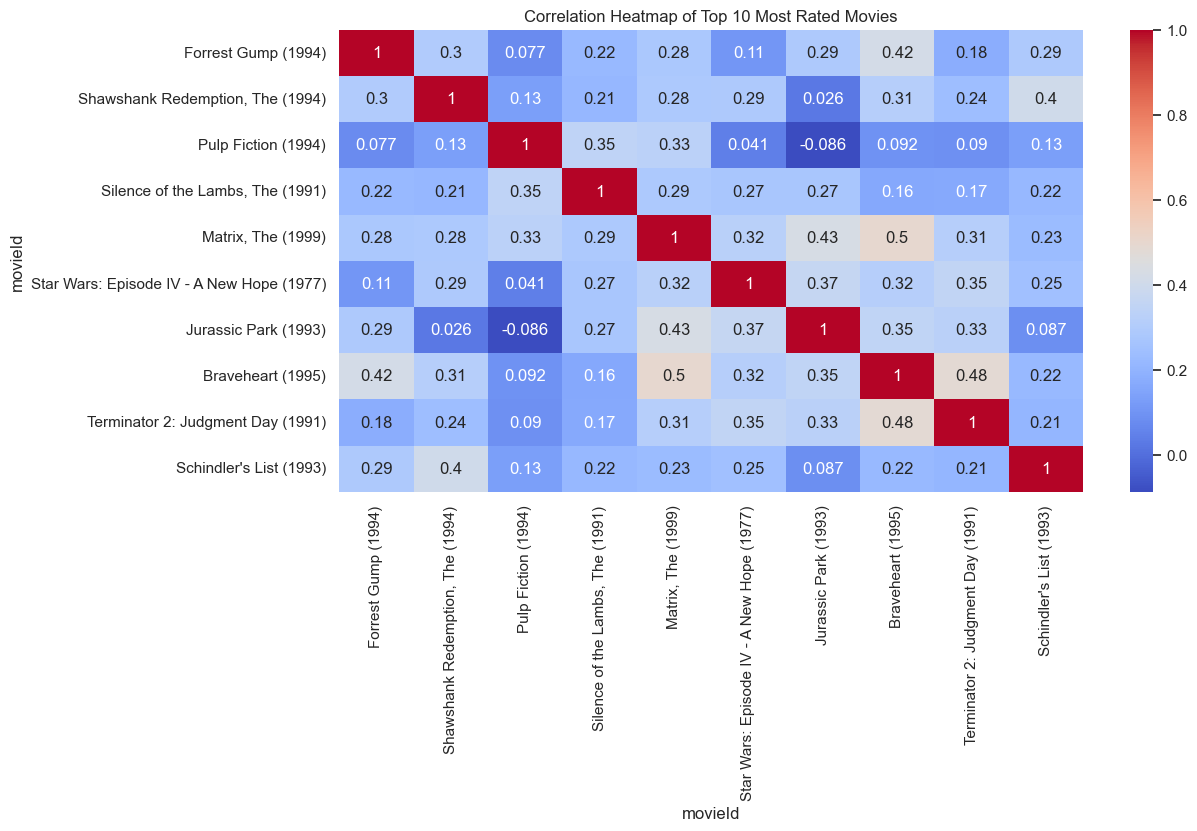

In [21]:
# Correlation heatmap of top 10 most rated movies (smaller subset)
top_10_ratings_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
top_10_ratings_matrix = top_10_ratings_matrix[top_10_rated_movies]
corr = top_10_ratings_matrix.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', xticklabels=top_10_movies['title'], yticklabels=top_10_movies['title'])
plt.title('Correlation Heatmap of Top 10 Most Rated Movies')
plt.show()